Emotions Detection

In [5]:
!pip install matplotlib

In [11]:
pip install glob2 opencv-python tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

In [10]:
print(tf.__version__)

2.18.0


In [11]:
# Exploring Data
images = glob("C:/Users/ADMIN/Desktop/Emotions Detection/Dataset/train/**/**", recursive=True)

In [12]:
print("Total images found:", len(images))

Total images found: 57433


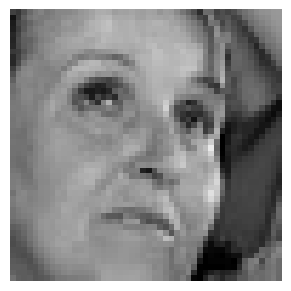

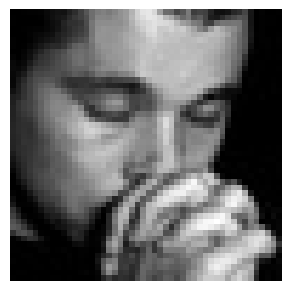

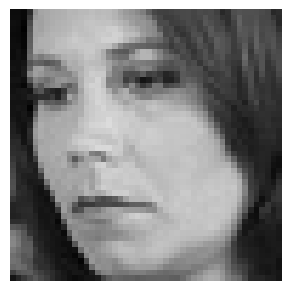

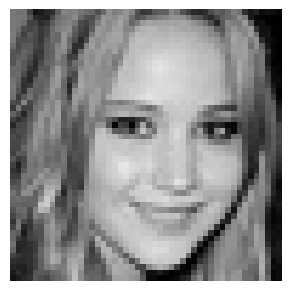

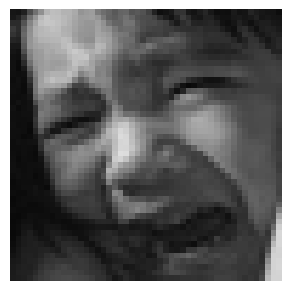

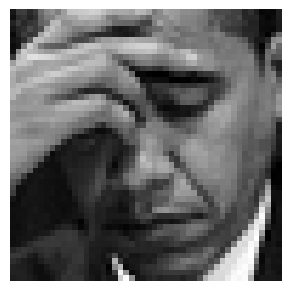

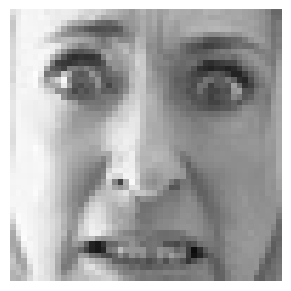

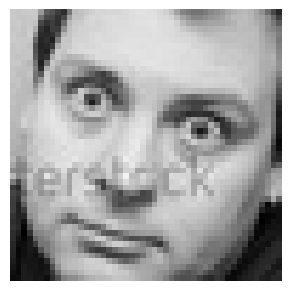

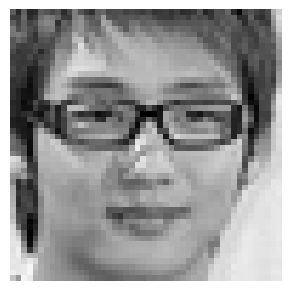

In [13]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12, 12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));
    plt.axis("off")

In [16]:
img_size = 48
batch_size = 64

# Training Data Generator
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(
    "C:/Users/ADMIN/Desktop/Emotions Detection/Dataset/train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Validation Data Generator
datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory(
    "C:/Users/ADMIN/Desktop/Emotions Detection/Dataset/test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [40]:
# Defining the model
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [42]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)

    return x

In [44]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(inputs, 64, (5, 5))
    conv_3 = Convolution(inputs, 128, (3, 3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten, 256)

    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss = ["categorical_crossentropy"], optimizer = "adam", metrics = ["accuracy"])

    return model

In [46]:
model = model_fer((48, 48, 1))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

In [66]:
# Initializing the model
epochs = 10
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]

In [68]:
# Train the model
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.4877 - loss: 1.3486
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 357s 797ms/step - accuracy: 0.4877 - loss: 1.3486 - val_accuracy: 0.4432 - val_loss: 1.4741
Epoch 2/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 5:10 694ms/step - accuracy: 0.4688 - loss: 1.4106
Epoch 2: saving model to model.weights.h5


D:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4688 - loss: 1.4106 - val_accuracy: 0.4000 - val_loss: 1.7499
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.5631 - loss: 1.1736
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 307s 685ms/step - accuracy: 0.5631 - loss: 1.1737 - val_accuracy: 0.4424 - val_loss: 1.4994
Epoch 4/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:49 648ms/step - accuracy: 0.5000 - loss: 1.1306
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5000 - loss: 1.1306 - val_accuracy: 0.3000 - val_loss: 1.7787
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.6228 - loss: 1.0283
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 294s 655ms/step - accuracy: 0.6227 - loss: 1.0284 - val_accuracy: 0.4131 - val_loss: 1.5253
Epoch 6/10
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:51 652ms/step - accuracy: 0.4219 - loss: 1.3217
Epoch 6: saving model to model.weights.h5


In [69]:
# Model Evaluation
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.4734 - loss: 1.5270


[1.5053473711013794, 0.47575926780700684]

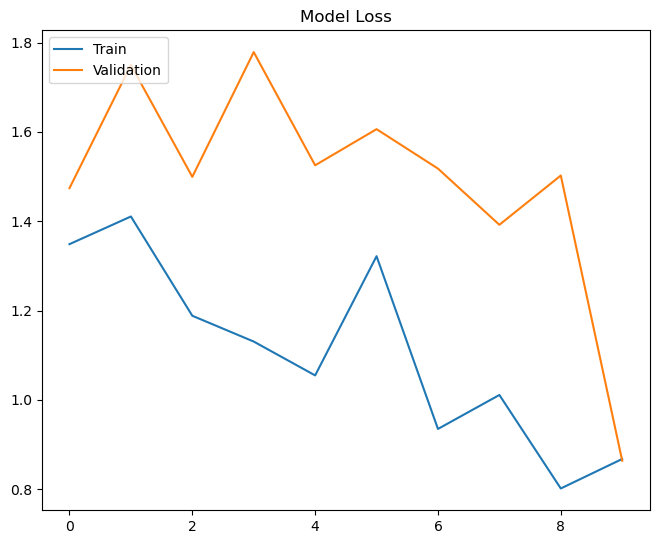

In [70]:
# Plotting Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.subplots_adjust(top=1.0, bottom=0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

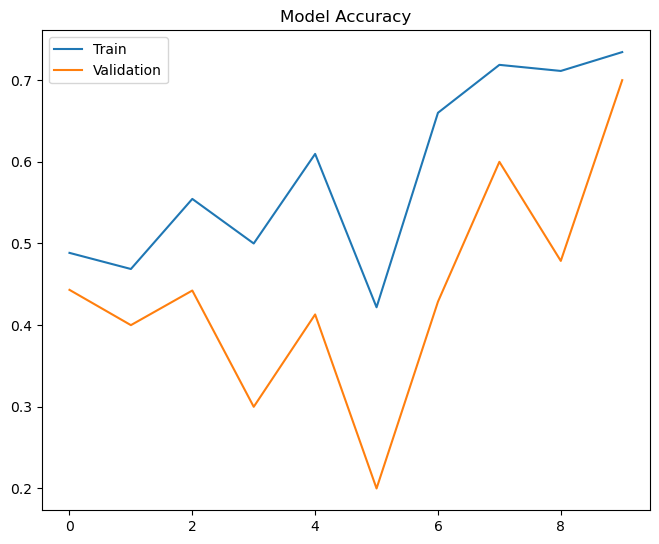

In [76]:
# Plotting Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.subplots_adjust(top=1.0, bottom=0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

In [78]:
# Saving Model
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)